# Machine Learning for Level Truncation in Open String Field Theory

Harold Erbin, Riccardo Finotello, Matej Kudrna, Martin Schnabl

---
---

## Abstract

In the framework of bosonic Open String Field Theory (OSFT), we consider several observables characterised by conformal weight and type, and the position of vacua in the potential for various values of truncated mass level. We focus on the prediction of the extrapolated value for the level-$\infty$ truncation using Machine Learning (ML) techniques.

In this notebook we focus on tidying the dataset and preparing it for the analysis.

In [1]:
%load_ext autoreload
%autoreload 2

## Load the Dataset

We first load the dataset and take a look at its properties before tidying its entries:

In [2]:
import pandas as pd

df = pd.read_json('./data/data_sft_list.json')

The dataset is composed of the following column types:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   init    46 non-null     object
 1   exp     46 non-null     object
 2   weight  46 non-null     object
 3   type    46 non-null     object
 4   2       46 non-null     object
 5   3       46 non-null     object
 6   4       46 non-null     object
 7   5       46 non-null     object
 8   6       46 non-null     object
 9   7       46 non-null     object
 10  8       46 non-null     object
 11  9       46 non-null     object
 12  10      46 non-null     object
 13  11      46 non-null     object
 14  12      46 non-null     object
 15  13      46 non-null     object
 16  14      46 non-null     object
 17  15      46 non-null     object
 18  16      46 non-null     object
 19  17      46 non-null     object
 20  18      46 non-null     object
dtypes: object(21)
memory usage: 7.7+ KB


The _dtypes_ are in general _object_ types and should be tidied before use. We can take a look at the first few entries:

In [4]:
df.head(3)

,init,exp,weight,type,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, -1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]","[0, 0, 1, 4, 9, 0, 0.25, 1, 2.25, 4, 0, 0.25, ...","[2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]",...,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]"
1,"[1.0001, 0, 1.0001, 1.0001, 1.0001, 1.0001, 0,...","[1, 0, -1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]","[0, 0, 1, 4, 9, 0, 0.249950007499, 0.999800029...","[2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[1.000099754465899, -4.382819109385611e-08, 0....","[1.000099754261711, -6.385189815988693e-08, 0....","[1.000099495309939, -1.9972775228453091e-07, 0...","[1.000099494726808, -1.724421881015622e-07, 0....","[1.000099223845491, -3.2173432889712715e-07, 0...","[1.000099222907449, -2.856173963606407e-07, 0....",...,"[1.000098951488667, -3.9768513795577186e-07, 0...","[1.000098684133785, -5.470716468222031e-07, 0....","[1.000098682609473, -5.081256574169557e-07, 0....","[1.000098418312006, -6.559751804689415e-07, 0....","[1.000098416531483, -6.169537248661669e-07, 0....","[1.000098155198292, -7.630807670831046e-07, 0....","[1.000098153176776, -7.242020485026188e-07, 0....","[1.000097894670832, -8.685182838696036e-07, 0....","[1.000097892420157, -8.29888184051414e-07, 0.9...","[1.000097636616163, -9.72346758033437e-07, 0.9..."
2,"[1.001, 0, 1.001, 1.001, 1.001, 1.001, 0, 0, 0...","[1, 0, -1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]","[0, 0, 1, 4, 9, 0, 0.24950074900124802, 0.9980...","[2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[1.000976232275641, -3.8820163895943e-06, 0.90...","[1.000976049237533, -5.9682788728782085e-06, 0...","[1.000952815386108, -1.689178344782202e-05, 0....","[1.000952352120989, -1.5047680126166993e-05, 0...","[1.000929855311967, -2.5515953552563565e-05, 0...","[1.000929190755388, -2.3264350581688953e-05, 0...",...,"[1.0009075350494, -3.03802946004187e-05, 0.664...","[1.000888236249875, -3.860013055708573e-05, 0....","[1.000887354078869, -3.657126395737419e-05, 0....","[1.000869431716091, -4.387998808033297e-05, 0....","[1.000868490272024, -4.199905525467674e-05, 0....","[1.000851773655717, -4.853491335211209e-05, 0....","[1.000850791489764, -4.6788451470318466e-05, 0...","[1.000835137520457, -5.266383019452565e-05, 0....","[1.000834127701389, -5.1036790056833293e-05, 0...","[1.000819417460843, -5.634321216588246e-05, 0...."


In fact all the entries are vectors corresponding to a particular solution. The idea is therefore to tidy the dataset by separating all the entries while keeping track of the original solution.

The dimensions of the dataset are:

In [5]:
print('No. of rows:    {:d}'.format(df.shape[0]))
print('No. of columns: {:d}'.format(df.shape[1]))

No. of rows:    46
No. of columns: 21


The columns of the dataset are:

In [6]:
columns = df.columns.tolist()
columns

['init',
 'exp',
 'weight',
 'type',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18']

They refer to different properties of each solution: `init` is the initial position, columns from `2` to `18` represent lumps at different truncation levels, `weight` and `type` are observables referring to conformal properties and the oscillation of the solution, and `exp` is the extrapolated label at truncation level $\infty$.

To better handle the columns in the dataset in the analysis we rename the truncation levels prepending the string "level" to each of them (to be able to grab them using a simple regex and avoid issues with other numeric data):

In [7]:
import re

colrename = lambda s: re.sub(r'^([0-9]*)$', r'level_\1', s)
df        = df.rename(columns=colrename)

# temporary save the new dataset to file
df.to_json('./data/sft-trunc_tmp.json', orient='split', index=False)

# print the columns
df.columns.tolist()

['init',
 'exp',
 'weight',
 'type',
 'level_2',
 'level_3',
 'level_4',
 'level_5',
 'level_6',
 'level_7',
 'level_8',
 'level_9',
 'level_10',
 'level_11',
 'level_12',
 'level_13',
 'level_14',
 'level_15',
 'level_16',
 'level_17',
 'level_18']

Moreover not all solutions are the same length in the dataset. In fact they increase in the column direction:

In [8]:
INPUT = './data/sft-trunc_tmp.json'
OUTPUT = 'sol_length'

!python3 ./scripts/sol-length.py --input {INPUT} --output {OUTPUT}

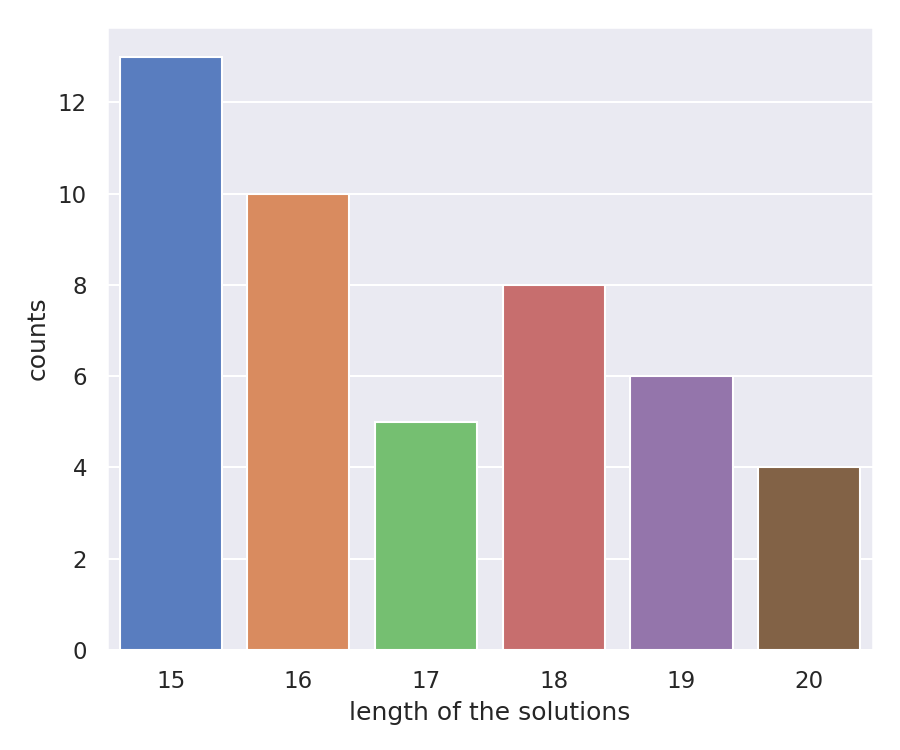

In [9]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

## Tidy the Dataset

We then tidy the dataset by first inserting a reference to the solution and then flatten each vector entry.

In [10]:
import numpy  as np
import pandas as pd

# load the dataset and apply the transformations
df     = pd.read_json('./data/sft-trunc_tmp.json', orient='split')
shapes = df.applymap(len)
shapes = shapes.apply(lambda x: np.unique(x).squeeze(), axis=1)

# add the ID of the solution
solutions = [] #------------------------------------ create a list of vectors
for n in range(shapes.shape[0]):
    solutions.append(np.full(shapes.iloc[n], n)) #-- insert vec. of the IDs

# add the column to the dataset and reorder
df['solutions'] = solutions
df = df[['solutions',
         'init',
         'weight',
         'type',
         'exp',
         'level_2',
         'level_3',
         'level_4',
         'level_5',
         'level_6',
         'level_7',
         'level_8',
         'level_9',
         'level_10',
         'level_11',
         'level_12',
         'level_13',
         'level_14',
         'level_15',
         'level_16',
         'level_17',
         'level_18'
        ]
       ]

# stack each vector on top of each other
df = pd.concat([pd.DataFrame({f: df[f].iloc[n] for f in df})
                for n in range(df.shape[0]) 
               ],
               axis=0,
               ignore_index=True
              )

The new dataset is therefore entirely numeric and can be used for the analysis:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   solutions  778 non-null    int64  
 1   init       778 non-null    float64
 2   weight     778 non-null    float64
 3   type       778 non-null    int64  
 4   exp        778 non-null    int64  
 5   level_2    778 non-null    float64
 6   level_3    778 non-null    float64
 7   level_4    778 non-null    float64
 8   level_5    778 non-null    float64
 9   level_6    778 non-null    float64
 10  level_7    778 non-null    float64
 11  level_8    778 non-null    float64
 12  level_9    778 non-null    float64
 13  level_10   778 non-null    float64
 14  level_11   778 non-null    float64
 15  level_12   778 non-null    float64
 16  level_13   778 non-null    float64
 17  level_14   778 non-null    float64
 18  level_15   778 non-null    float64
 19  level_16   778 non-null    float64
 20  level_17  

We can therefore save the dataset to file and proceed:

In [12]:
df.to_csv('./data/sft-trunc_tidy.csv', index=False)